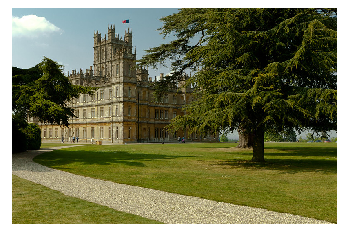

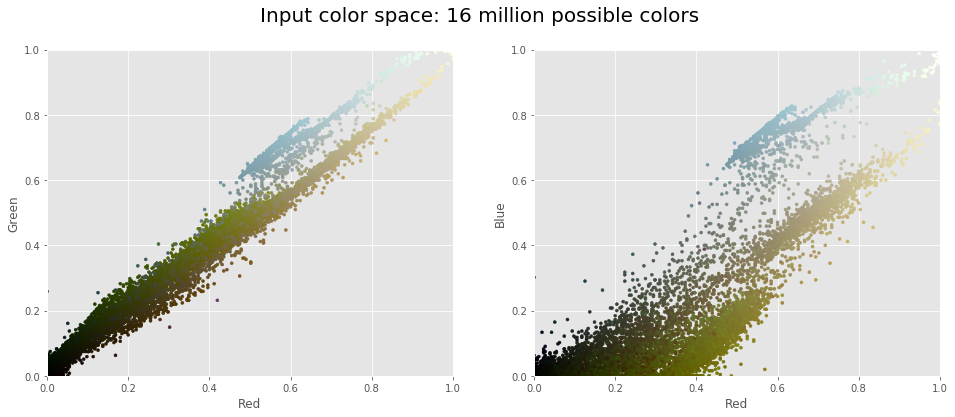

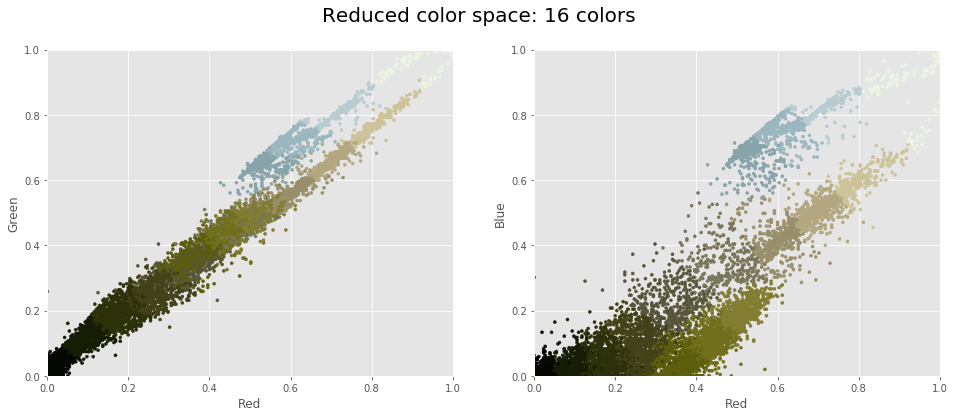

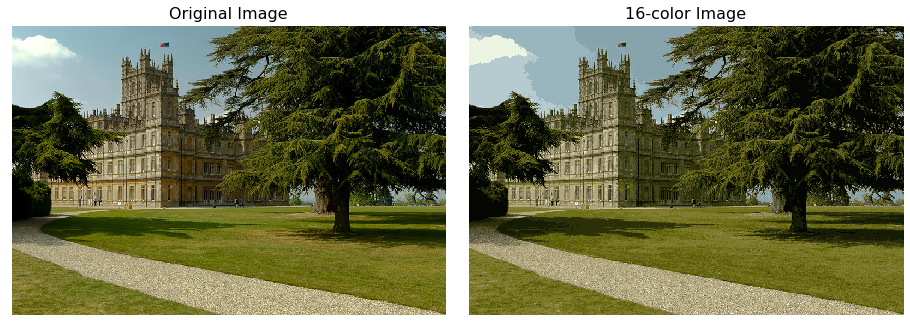

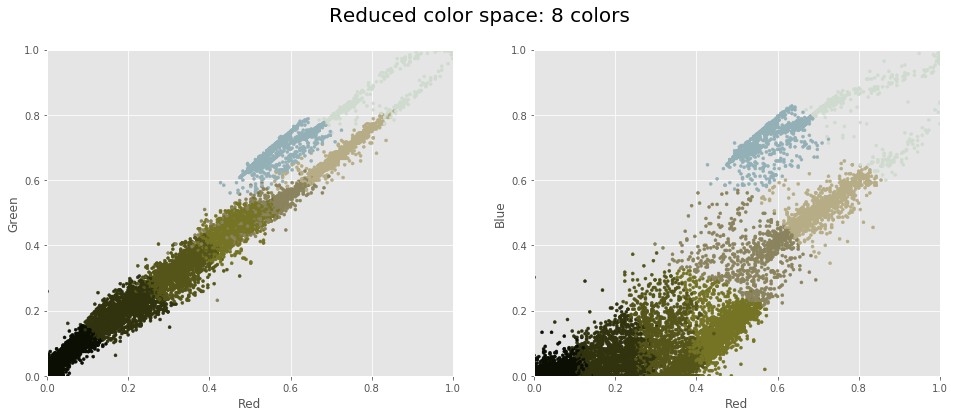

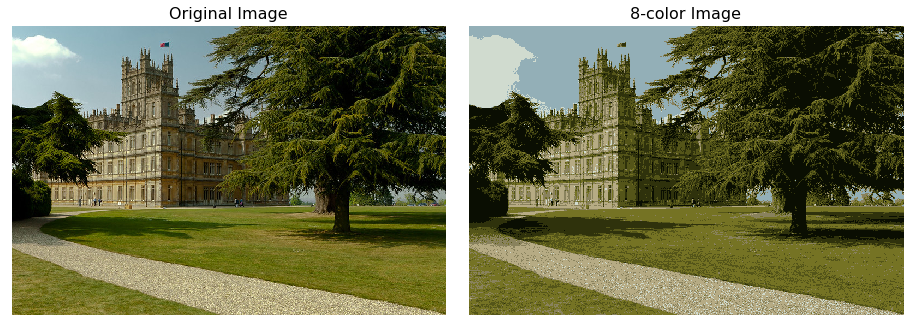

In [17]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import imageio
from skimage import io
import os
img = io.imread('777Picture.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);
import pandas as pd
import numpy as np

img.shape

#using 0...1 scale

data = img / 255.0 
data = data.reshape(533 * 799, 3)
data.shape

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    #Choosing a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')

import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")


picture_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(picture_recolored)
ax[1].set_title('16-color Image', size=16);

kmeans = MiniBatchKMeans(8)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 8 colors")

picture_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(picture_recolored)
ax[1].set_title('8-color Image', size=16);

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import numpy as np
data3 = np.load('ICUvalid.data')
import numpy as np
data2 = np.load('ICUtest.data')
import numpy as np
data1 = np.load('ICUtrain.data')

data1.files
data2.files
data3.files


x_train = data1['X_train']
x_test = data2['X_test']
x_valid = data3['X_valid']
Y_train = data1['y_train']
Y_test = data2['y_test']
Y_valid = data3['y_valid']


regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, Y_train)
y_pred = regressor.predict(x_test)


from sklearn.metrics import accuracy_score, roc_auc_score

print(roc_auc_score(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))



clf = RandomForestClassifier(n_estimators=10, max_depth=3,
                              random_state=0)
clf.fit(x_train, Y_train)  
print(accuracy_score(Y_train,clf.predict(x_train)))



clf = RandomForestClassifier(n_estimators=50, max_depth=3,
                              random_state=0)
clf.fit(x_train, Y_train)  
print(accuracy_score(Y_train,clf.predict(x_train)))


clf = RandomForestClassifier(n_estimators=100, max_depth=3,
                              random_state=0)
clf.fit(x_train, Y_train)  
print(accuracy_score(Y_train,clf.predict(x_train)))


clf = RandomForestClassifier(n_estimators=10, max_depth=5,
                              random_state=0)
clf.fit(x_train, Y_train)  
print(accuracy_score(Y_train,clf.predict(x_train)))

clf = RandomForestClassifier(n_estimators=50, max_depth=5,
                              random_state=0)
clf.fit(x_train, Y_train)  
print(accuracy_score(Y_train,clf.predict(x_train)))

clf = RandomForestClassifier(n_estimators=100, max_depth=5,
                              random_state=0)
clf.fit(x_train, Y_train)  
print(accuracy_score(Y_train,clf.predict(x_train)))

0.5740033222591363
0.869
0.865
0.8675
0.865
0.8895
0.8885
0.887


In [19]:
from __future__ import print_function
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.optimizers import RMSprop


batch_size = 128
num_classes = 10
epochs = 20


#spliting the data between train and test sets
value1 = np.load('ICUtrain.data')
value1.files




x_train = value1['X_train']
x_train.shape


Y_train = value1['y_train']


# the data, split between train and test sets
value2 = np.load('ICUtest.data')
value2.files

x_test = value2['X_test']

Y_test = value2['y_test']


model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(112,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

epochs=250
model.fit(x_train,Y_train,epochs=epochs,verbose=1)


df=pd.DataFrame(Y_train)

df[0].unique()

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\15704\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\15704\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\15704\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\15704\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\15704\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.

During handling of the 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\15704\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\15704\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\15704\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\15704\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\15704\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.

During handling of the 

TypeError: can only concatenate str (not "list") to str